In [319]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Load the dataset and view first 5 rows of data set
Spotify_data = pd.read_csv('Spotify Most Streamed Songs.csv')
Spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [320]:
# Drop non-relevant columns (example)
Spotify_data.drop(['artist(s)_name','track_name'], axis=1, inplace=True)

# Drop rows with missing values
Spotify_data.dropna(inplace=True)

In [321]:
Spotify_data['streams']=pd.to_numeric(Spotify_data['streams'],errors='coerce')
# create column called Over_1_Billion where the streams are over 1 billion 
Spotify_data['Over_1_Billion'] = Spotify_data['streams'] > 1000000000

<h3>Graph 1: Distribution of streams</h3>

Text(0, 0.5, 'Count')

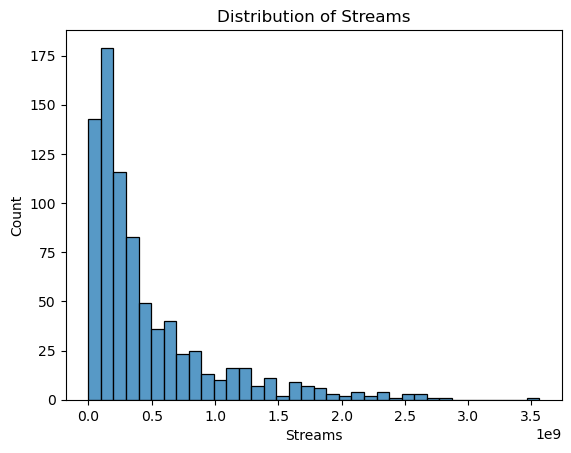

In [322]:
sns.histplot(Spotify_data['streams'])
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Count')

<h3>Graph 2: Danceability vs streams</h3>

Text(0, 0.5, 'Streams')

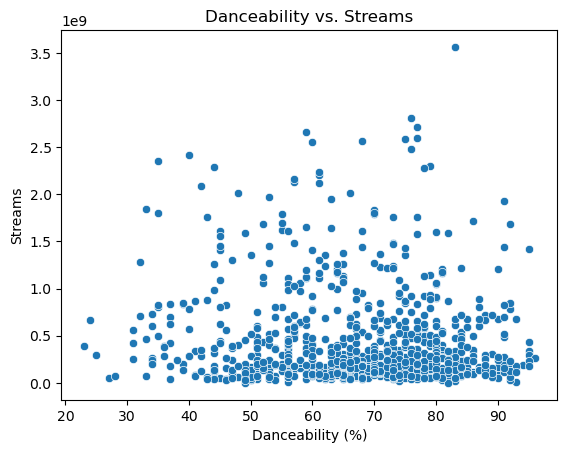

In [323]:
sns.scatterplot(x='danceability_%', y='streams', data=Spotify_data)
plt.title('Danceability vs. Streams')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')

<h3>Graph 3: Energy vs streams</h3>

Text(0, 0.5, 'Streams')

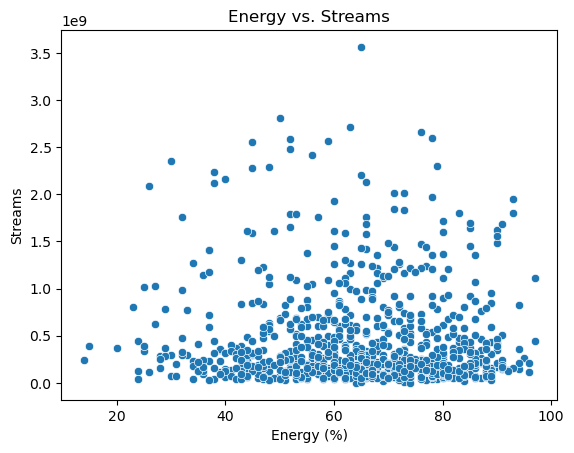

In [324]:
sns.scatterplot(x='energy_%', y='streams', data=Spotify_data)
plt.title('Energy vs. Streams')
plt.xlabel('Energy (%)')
plt.ylabel('Streams')

<h3>Graph 4: Loudness vs streams</h3>

Text(0, 0.5, 'Streams')

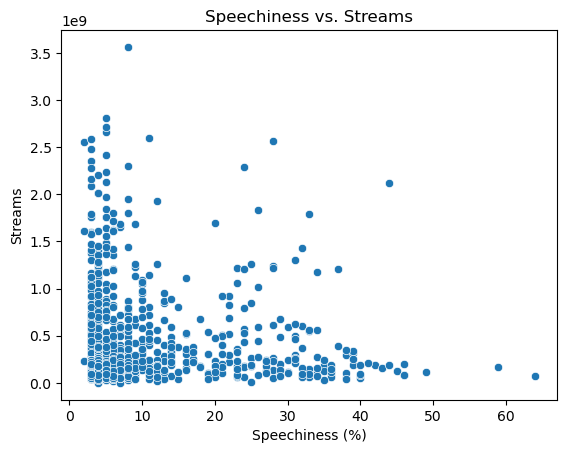

In [325]:
sns.scatterplot(x='speechiness_%', y='streams', data=Spotify_data)
plt.title('Speechiness vs. Streams')
plt.xlabel('Speechiness (%)')
plt.ylabel('Streams')

<h3>Graph 5: number of artists vs streams</h3>

Text(0, 0.5, 'Streams')

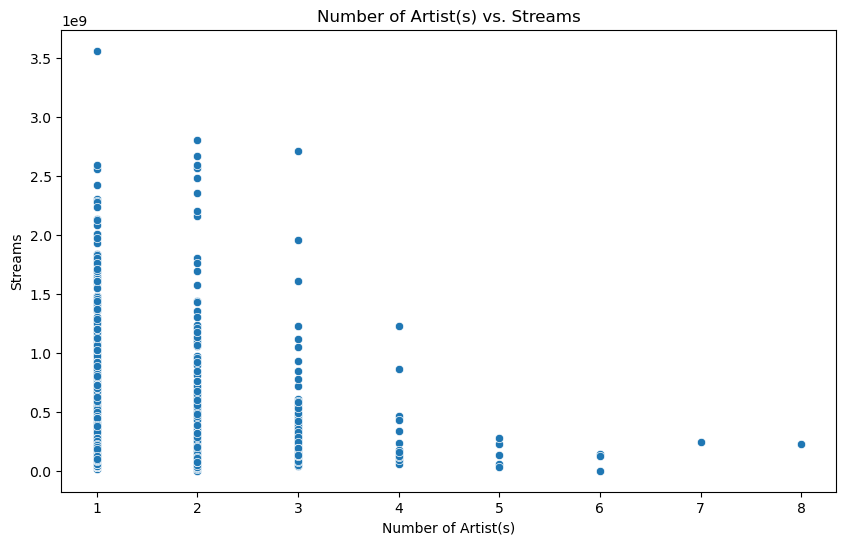

In [330]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='artist_count', y='streams', data=Spotify_data)
plt.title('Number of Artist(s) vs. Streams')
plt.xlabel('Number of Artist(s)')
plt.ylabel('Streams')

<h3>Train-test split</h3>

In [307]:
Song_Attributes = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']
X = Spotify_data[Song_Attributes]
y = Spotify_data['Over_1_Billion']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=87)

<h3>TRAINING MODEL</h3>

In [308]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [309]:
# testing the accuracy of the model
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.87      1.00      0.93       214
        True       0.00      0.00      0.00        32

    accuracy                           0.87       246
   macro avg       0.43      0.50      0.47       246
weighted avg       0.76      0.87      0.81       246



c:\Users\diask\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diask\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diask\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [311]:
# Predictions
my_test = {
 'danceability_%': [76],
    'valence_%': [91],
    'energy_%': [50],
    'acousticness_%': [54],
    'instrumentalness_%': [0],
    'liveness_%': [7],
    'speechiness_%': [5],
    'bpm': [90]
}
df = pd.DataFrame(my_test)
print(logmodel.predict(df))



[False]
